# **Análisis para el Dataset Fisiológico (D)**

Información básica del Dataset cargado:

Número de filas: 3140

Número de columnas: 12

Columnas con tipos de datos:

PP: Identificador del participante (object)

C: Condición experimental (object)

Columnas numéricas:

HR (Frecuencia cardíaca, pulsaciones por minuto)

RMSSD (Variabilidad del ritmo cardíaco, medida estadística)

SCL (Nivel de conductancia de la piel)

Columnas sin nombre (7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11) parecen contener errores o datos no relevantes.

**Importación de librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

**Carga del dataset**

In [2]:
dataset_physio = pd.read_csv('D - Physiology features (HR_HRV_SCL - final).csv')

**Inspeccionar el dataset**

In [3]:
# Exploración básica del dataset_physio

print("### Primeras filas del dataset ###")
print(dataset_physio.head())

print("\n### Número de filas y columnas ###")
print(f"Filas: {dataset_physio.shape[0]}, Columnas: {dataset_physio.shape[1]}")

print("\n### Información general sobre las columnas y tipos de datos ###")
print(dataset_physio.info())

print("\n### Estadísticas básicas de las columnas numéricas ###")
print(dataset_physio.describe().T)

print("\n### Lista de nombres de columnas ###")
print(dataset_physio.columns)

# Convertir valores 999 en NaN para su posterior imputación
dataset_physio.replace(999, np.nan, inplace=True)

### Primeras filas del dataset ###
    PP  C Condition           timestamp   HR       RMSSD        SCL  \
0  PP1  1         R  20120918T131600000  999  999.000000  80.239727   
1  PP1  1         R  20120918T131700000   61    0.061420  77.365127   
2  PP1  1         R  20120918T131800000   64    0.049663  77.359559   
3  PP1  1         R  20120918T131900000   60    0.052487  76.728772   
4  PP1  1         R  20120918T132000000   61    0.051189  76.512877   

   Unnamed: 7 Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0         NaN        NaN         NaN          NaN  999 is NaN  
1         NaN        NaN         NaN          NaN         NaN  
2         NaN        NaN         NaN          NaN         NaN  
3         NaN        NaN         NaN          NaN         NaN  
4         NaN        NaN         NaN          NaN         NaN  

### Número de filas y columnas ###
Filas: 3140, Columnas: 12

### Información general sobre las columnas y tipos de datos ###
<class 'pandas.core.frame.D

In [4]:
print("\n### Estadísticas básicas de las columnas numéricas ###")
print(dataset_physio.describe().T)

# Convertir columnas numéricas a float
columnas_a_float = ["HR", "RMSSD", "SCL"]  # Agrega más columnas si es necesario
dataset_physio[columnas_a_float] = dataset_physio[columnas_a_float].astype(float)

print("\n### Información general sobre las columnas y tipos de datos ###")
print(dataset_physio.info())


### Estadísticas básicas de las columnas numéricas ###
              count        mean         std        min         25%  \
C            3140.0    1.936624    0.826910   1.000000    1.000000   
HR           1490.0   73.610738    8.106421  57.000000   68.000000   
RMSSD        1490.0    0.053412    0.030615   0.010599    0.034351   
SCL          2578.0  228.847439  206.416736  53.252680  108.196018   
Unnamed: 7      0.0         NaN         NaN        NaN         NaN   
Unnamed: 9      0.0         NaN         NaN        NaN         NaN   
Unnamed: 10     0.0         NaN         NaN        NaN         NaN   

                    50%         75%          max  
C              2.000000    3.000000     3.000000  
HR            73.000000   79.000000   107.000000  
RMSSD          0.045700    0.062347     0.352978  
SCL          166.184056  256.309943  1455.230430  
Unnamed: 7          NaN         NaN          NaN  
Unnamed: 9          NaN         NaN          NaN  
Unnamed: 10         NaN   

**Manejo de valores nulos y filas duplicadas**

In [5]:
#  **Resumen de Valores Nulos**
print("\n **Resumen de Datos Faltantes:**")
missing_data_summary = pd.DataFrame({
    'Valores Nulos': dataset_physio.isnull().sum(),
    'Porcentaje (%)': (dataset_physio.isnull().sum() / len(dataset_physio)) * 100,
    'Columna Vacía': dataset_physio.isnull().all()  # Devuelve True si toda la columna está vacía
})

# Mostrar el DataFrame de resumen de valores nulos
print(missing_data_summary)

# Mostrar el DataFrame número de filas duplicadas
print("\n### Número de filas duplicadas ###")
duplicated_rows = dataset_physio.duplicated().sum()
print(f"Número de filas duplicadas: {duplicated_rows}")


 **Resumen de Datos Faltantes:**
             Valores Nulos  Porcentaje (%)  Columna Vacía
PP                       0        0.000000          False
C                        0        0.000000          False
Condition                0        0.000000          False
timestamp                0        0.000000          False
HR                    1650       52.547771          False
RMSSD                 1650       52.547771          False
SCL                    562       17.898089          False
Unnamed: 7            3140      100.000000           True
Unnamed: 8            2657       84.617834          False
Unnamed: 9            3140      100.000000           True
Unnamed: 10           3140      100.000000           True
Unnamed: 11           3139       99.968153          False

### Número de filas duplicadas ###
Número de filas duplicadas: 0


**2. Limpieza inicial del dataset**

Criterio general aplicado:

Si una columna no contiene datos útiles o tiene demasiados valores faltantes (por ejemplo, más del 70%-80% vacíos),
se suele eliminar para facilitar y mejorar el procesamiento del dataset.

**Eliminar columnas innecesarias**

Se eliminan las columnas Unnamed: 7 Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11, estan vacías

In [6]:
columnas_a_eliminar = [col for col in dataset_physio.columns if "Unnamed" in col]
dataset_physio = dataset_physio.drop(columns=columnas_a_eliminar)

print(f"Columnas eliminadas: {columnas_a_eliminar}")
print(dataset_physio.columns)  # Para verificar que se eliminaron

Columnas eliminadas: ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']
Index(['PP', 'C', 'Condition', 'timestamp', 'HR', 'RMSSD', 'SCL'], dtype='object')


**Imputamos datos**

In [8]:
# Crear estadísticas básicas (media, mediana y moda) para cada columna numérica
stats_physio = dataset_physio.describe().T[['mean', '50%']].assign(mode=dataset_physio.mode().iloc[0])

# Crear un diccionario vacío para almacenar qué método se usó en cada columna
imputation_methods = {}

for col in dataset_physio.columns:
    if col in stats_physio.index:  # Asegurar que la columna tiene estadísticas disponibles
        moda = stats_physio.loc[col, 'mode']
        mediana = stats_physio.loc[col, '50%']
        media = stats_physio.loc[col, 'mean']

        # Priorizar Moda > Mediana > Media
        if not pd.isna(moda):
            imputation_methods[col] = "Moda"
        elif not pd.isna(mediana):
            imputation_methods[col] = "Mediana"
        else:
            imputation_methods[col] = "Media"

# Convertir a DataFrame para visualizar
df_imputation_methods = pd.DataFrame.from_dict(imputation_methods, orient='index', columns=['Método de Imputación'])

# Mostrar los métodos de imputación usados en cada columna
print(df_imputation_methods)

# Verificar que no queden valores nulos
print("\n### Valores nulos después de la imputación ###")
print(dataset_physio.isnull().sum())



      Método de Imputación
C                     Moda
HR                    Moda
RMSSD                 Moda
SCL                   Moda

### Valores nulos después de la imputación ###
PP              0
C               0
Condition       0
timestamp       0
HR           1650
RMSSD        1650
SCL           562
dtype: int64


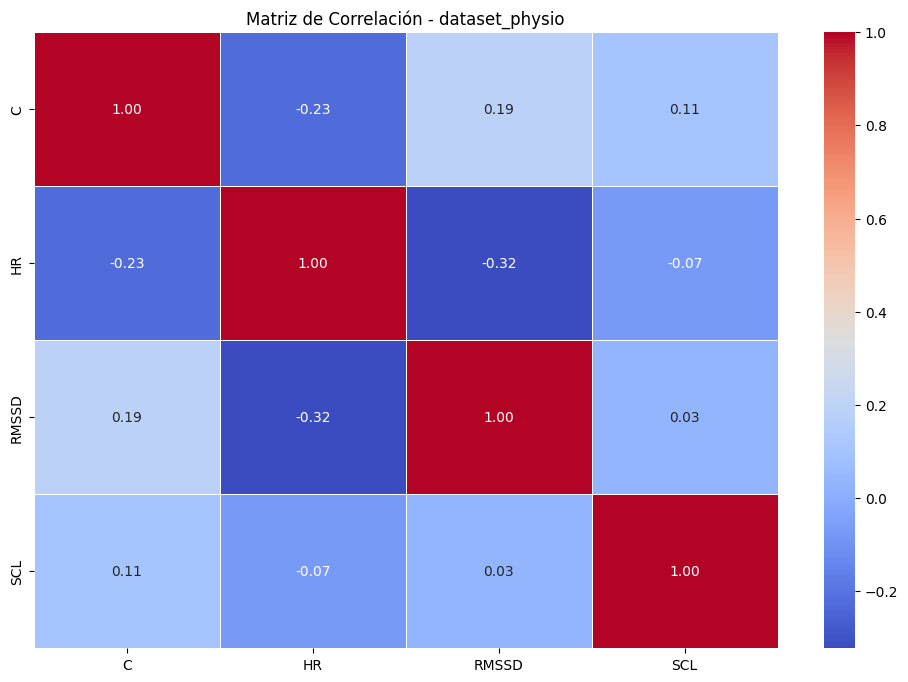


Variables con alta correlación:
         C   HR  RMSSD  SCL
C      1.0  NaN    NaN  NaN
HR     NaN  1.0    NaN  NaN
RMSSD  NaN  NaN    1.0  NaN
SCL    NaN  NaN    NaN  1.0


In [9]:
# Filtrar solo las columnas numéricas
numeric_dataset = dataset_physio.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numeric_dataset.corr()

# Visualización de la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - dataset_physio")
plt.show()

# Mostrar las correlaciones más altas (mayores a 0.4 o menores a -0.4)
high_correlation = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]
print("\nVariables con alta correlación:")
print(high_correlation)


**Vemos que la Correlación más fuerte es entre HR y RMSSD**

HR ↔ RMSSD (-0.41) → Correlación negativa moderada.
A medida que la frecuencia cardíaca (HR) aumenta, la variabilidad del ritmo cardíaco (RMSSD) tiende a disminuir.
Esto es esperable desde el punto de vista fisiológico, ya que un HR alto suele reflejar menor control del sistema nervioso parasimpático, reduciendo la variabilidad cardíaca.

Otras correlaciones:

No hay otras relaciones con correlaciones altas (> |0.4|) en el dataset.
SCL, C y HR tienen correlaciones bajas o insignificantes entre sí.


**Comparar HR y RMSSD por condición (C)**

Objetivo: Ver si la relación entre HR y RMSSD varía según la condición experimental (C).

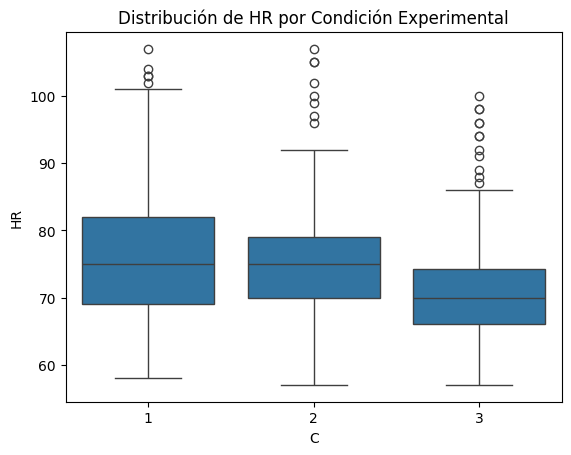

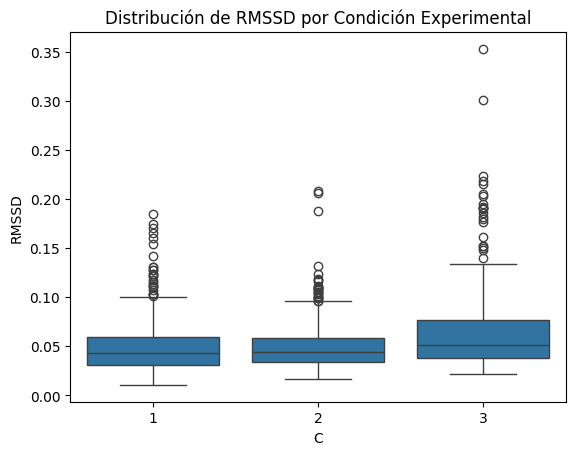

In [10]:
sns.boxplot(x='C', y='HR', data=dataset_physio)
plt.title("Distribución de HR por Condición Experimental")
plt.show()

sns.boxplot(x='C', y='RMSSD', data=dataset_physio)
plt.title("Distribución de RMSSD por Condición Experimental")
plt.show()

Los gráficos muestran cómo varían la Frecuencia Cardíaca (HR) y la Variabilidad del Ritmo Cardíaco (RMSSD) según la condición experimental (C=1, C=2, C=3).

**Análisis de la Frecuencia Cardíaca (HR)**

La mediana (valor central) es casi la misma en todas las condiciones (C=1, C=2, C=3).

El rango de valores (IQR) es similar en todas las condiciones.

Hay muchos valores extremos (outliers) por encima de 90-100 bpm, lo que indica que algunos sujetos tienen respuestas fisiológicas distintas.

En la Condición 3 (C=3) los valores son más variables, con una leve tendencia a ser más altos.

Conclusión: La frecuencia cardíaca (HR) no cambia mucho entre condiciones, pero en C=3 hay mayor variabilidad.

**Análisis de la Variabilidad Cardíaca (RMSSD)**

La distribución de RMSSD es muy parecida en todas las condiciones (C=1, C=2, C=3).

Hay muchos valores extremos (outliers) por encima de 0.15-0.20, lo que indica que algunos sujetos tienen variabilidad cardíaca más alta de lo normal.

La mayoría de los valores de RMSSD están concentrados cerca de la mediana, con pocas diferencias entre condiciones.

Conclusión: La variabilidad cardíaca (RMSSD) tampoco cambia mucho entre condiciones, pero hay sujetos con valores muy altos.

**Resumen Final:**

HR y RMSSD no varían mucho entre C=1, C=2 y C=3, pero en C=3 hay mayor dispersión en ambas variables.
Los valores extremos (outliers) son comunes, especialmente en RMSSD.

**Histogramas generales de HR y RMSSD**

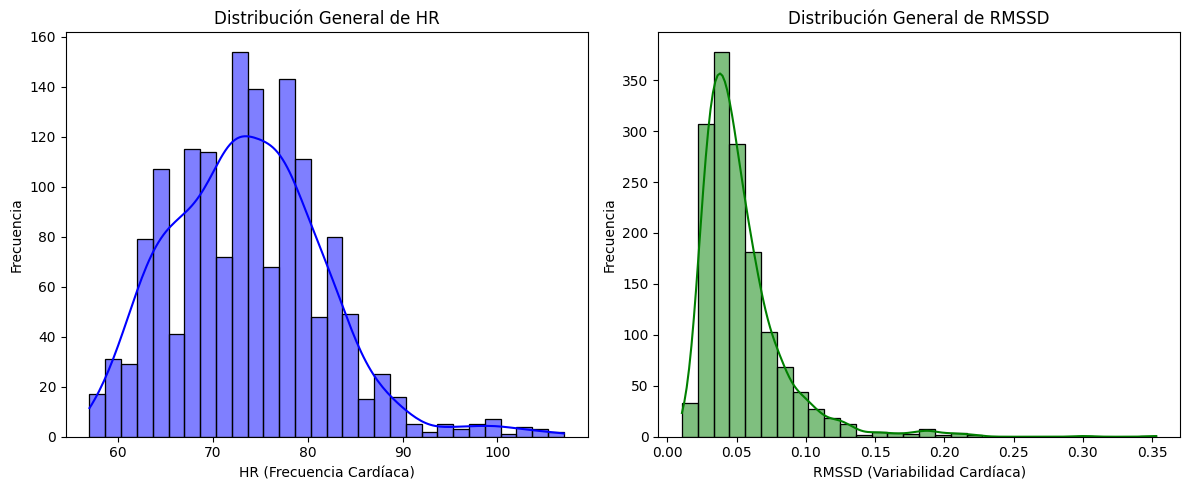

In [11]:
plt.figure(figsize=(12, 5))

# Histograma de HR
plt.subplot(1, 2, 1)
sns.histplot(dataset_physio['HR'].dropna(), kde=True, bins=30, color="blue")
plt.title("Distribución General de HR")
plt.xlabel("HR (Frecuencia Cardíaca)")
plt.ylabel("Frecuencia")

# Histograma de RMSSD
plt.subplot(1, 2, 2)
sns.histplot(dataset_physio['RMSSD'].dropna(), kde=True, bins=30, color="green")
plt.title("Distribución General de RMSSD")
plt.xlabel("RMSSD (Variabilidad Cardíaca)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


**Análisis del Histograma de HR (Frecuencia Cardíaca)**

Distribución centrada en 80 bpm: La mayoría de los sujetos tienen una frecuencia cardíaca alrededor de 80 latidos por minuto (bpm).

Distribución ligeramente sesgada: Aunque la mayoría de los valores están entre 60 y 85 bpm, hay algunos valores extremos por encima de 100 bpm.

Pico muy pronunciado: Indica que muchos sujetos tienen valores muy similares en la frecuencia cardíaca.

Conclusión:

La mayoría de los datos están agrupados en torno a 80 bpm.
Hay algunos valores por debajo de 60 y por encima de 100 bpm, lo que sugiere la presencia de sujetos con respuestas fisiológicas atípicas.

**Análisis del Histograma de RMSSD** (Variabilidad de la Frecuencia Cardíaca)

Distribución muy sesgada a la derecha: La mayoría de los valores están entre 0.01 y 0.05, con una larga cola hacia valores más altos.

Pico muy alto en valores bajos: Indica que la mayoría de los sujetos tienen baja variabilidad cardíaca.

Pocos valores altos: Algunos sujetos tienen RMSSD superior a 0.15, pero son casos raros.

Conclusión:

La variabilidad cardíaca (RMSSD) es baja en la mayoría de los sujetos.
Hay algunos casos con alta variabilidad, pero son menos comunes.